#  RCA for Reducing Overweight and Obesity Rates

#### Introduction and Data Exploration

I was a fat kid. Because of this, the topic of weight loss and maintaining a trim, healthy physique has always been of interest to me. What does it take to get skinny? And more importantly, how does one stay skinny once you've reached your desired weight?

When I stumbled across this [data set](https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system) from Data.gov I was immediately intrigued. It had the percentages of obese and overweight people per state as well as the percentages of how many of them participated in healthy habits such as physical exercise and eating a diet that included fruits and vegetables.

There are, however, limitations to what I could do with this data since this is not raw data but data that has already been manipulated and extrapolated. For example, the Min Cardio percentage of people represents the amount of people who participate in at least 2 hours of cardio per week. While the Max Cardio percentage represents people who participate in at least 5 hours of cardio per week. Thus, the Min Cardio percentage is inclusive of the Max Cardio percentage. The same cannot be said however about the percent of obese vs the percent of overweight classifications. In this case, the percentage of overweight is not inclusive of the obesity percentage. For that reason, I had to add those two columns together to create an "overweight and obese" category since looking at them separately proved to be problematic and suggested inaccurate inferrences.

Also because this is pre-explored data, I wasn't able to extrapolate information that I think would have been useful. I couldn't find the exact characteristics of the obese or overweight groups. I can just see general population trends, but not pinpoint who was and wasn't participating in the healthy habits. As far as I knew, an obese person could have been doing ever single healthy habit and still be obese. 

That being said, looking at the general trends did lend itself to some valueable insights that also led to a research proposal that I would be curious to see the result of. 

In examining this data, my first instinct was to uncover any possible corrilations between the healthy habits and the rates of people being categorized as either overweight or obese.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
us_health = pd.read_csv('US_Health.csv')

In [3]:
state_names = us_health['LocationDesc'].unique()
health_df = pd.DataFrame(index = state_names)

column_titles = ['% Obese', '% Over Weight', '%_Eats_Fruit', '%_Eats_Veg', '%_Lift',
       '%_Min_Cardio', '%_Lift_Cardio', '%_Max_Cardio', '%_Active']
def create_df(cat_type_1, cat_1):
    temp_df = pd.DataFrame(index = state_names)
    for c, ind in enumerate(us_health['Question'].unique()):
        temp_value = us_health[(us_health['StratificationCategory1']== cat_type_1) 
                               & (us_health['Stratification1']== cat_1)
                               &(us_health['Question']== ind)
                               &(us_health['YearStart']== 2015)][['Data_Value']]
        temp_df[column_titles[c]] = np.array(temp_value['Data_Value'])
    temp_df = temp_df.drop(['National'])
    temp_df['%_Eats_Fruit'] = 100 - temp_df['%_Eats_Fruit']
    temp_df['%_Eats_Veg'] = 100 - temp_df['%_Eats_Veg']
    temp_df['%_Active'] = 100 - temp_df['%_Active']
    temp_df['%_O_And_O'] = temp_df['% Obese'] + temp_df['% Over Weight']
    return temp_df

In [4]:
male_df = create_df('Gender','Male')

In [32]:
plot_y = ['%_Eats_Fruit', '%_Eats_Veg', '%_Lift',
       '%_Min_Cardio', '%_Lift_Cardio', '%_Max_Cardio', '%_Active']
def create_plots(data_frame, weight_class, title):
    fig = plt.figure(figsize= (16,16))
    for num, col in enumerate(plot_y, start =1):
        fig.add_subplot(4,2,num)
        sns.regplot(x=data_frame[weight_class] , y=data_frame[col])
    fig.suptitle(title, fontsize=30)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Below are a few scatter plots that demonstrate the corrolation between the various healthy habits and the rates of obesity and overweight classifications for men:

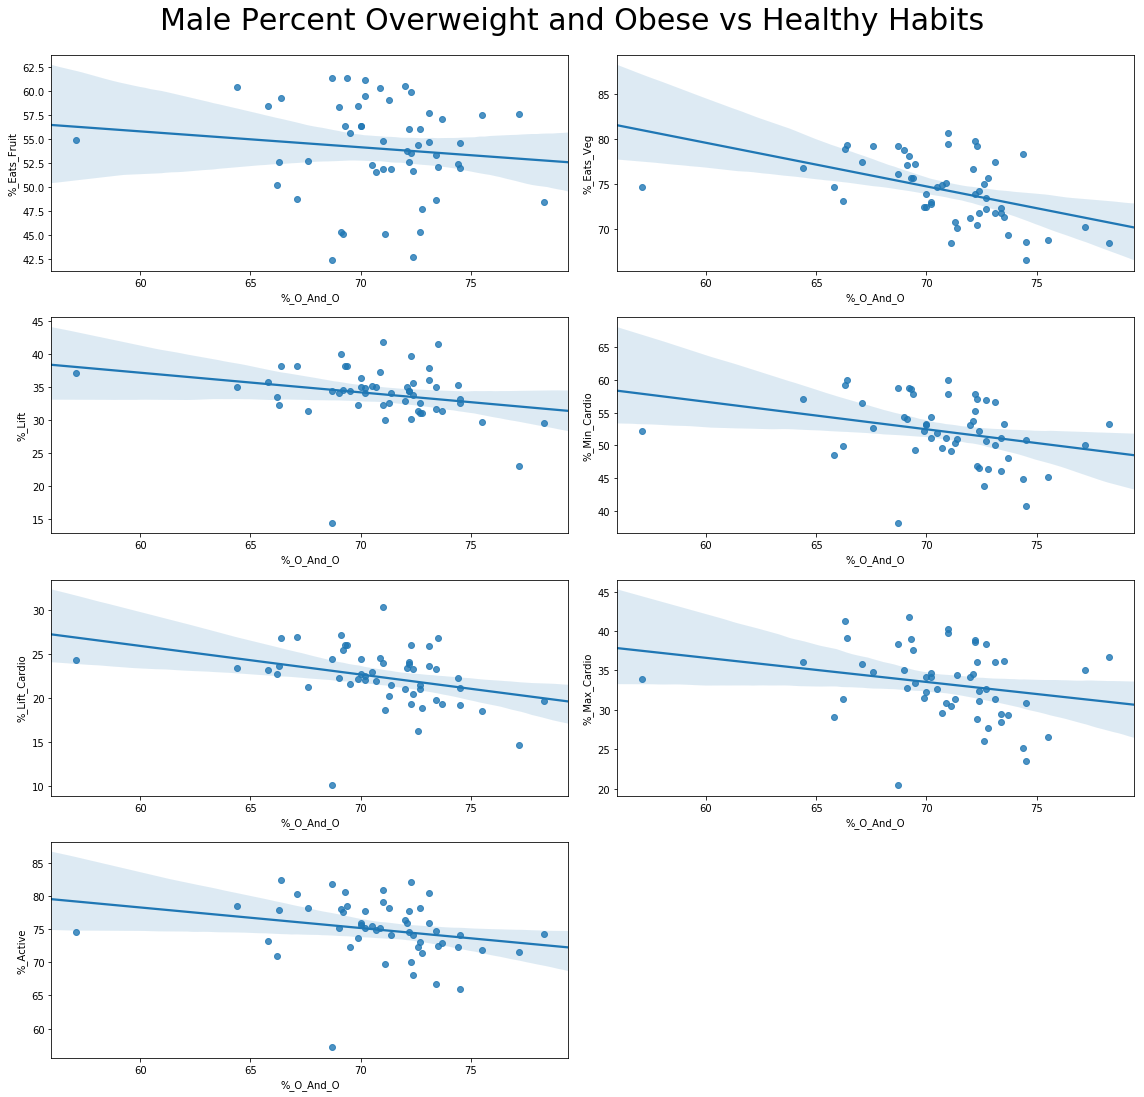

In [33]:
create_plots(male_df, '%_O_And_O', 'Male Percent Overweight and Obese vs Healthy Habits')
plt.show()

As you can see, there is a negative correlation between the percentages of obesity/overweight classifications and participiation in healthy eating and exercise habits. So basically, the more men exercised and ate fruits and vegetables, the slimmer they were.

It is startling to note, however, that the range of the x axis goes for 55% to 80%. That means that no state had less than a 55% rate of obesity/overweight classifications. Also, the heavier states that reached close to an 80% rate meant that there are places where almost 8 out of 10 people were obese or overweight. 

A similiar correlation can be found with females:

In [7]:
female_df = create_df('Gender','Female')

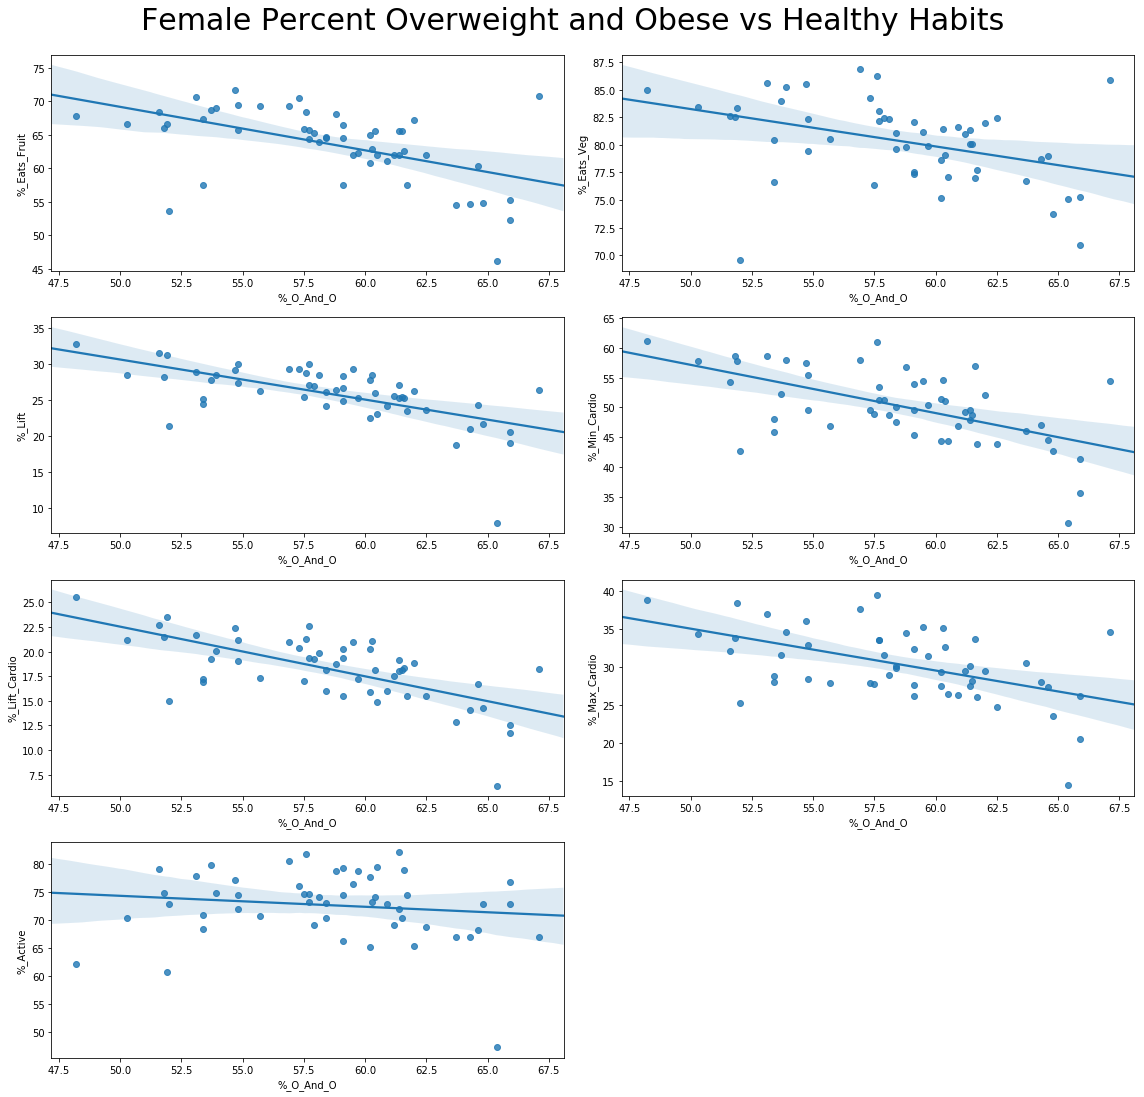

In [34]:
create_plots(female_df,'%_O_And_O','Female Percent Overweight and Obese vs Healthy Habits')

As with the men, the higher the percentage of women who practice healthy habits, the lower the rates of obesity and overweight conditions.

The range is not as bad as the men topping off just shy of 68 percent. But once again, it is a disturbingly high amount. 

I was able to make a few more inferrence by looking at how the correlations are clustered:

In [29]:
def create_jointplots(data_frame, weight_class, title):
    fig = plt.figure(figsize= (20,20))
    for num, col in enumerate(plot_y, start =1):
        fig.add_subplot(4,2,num)
        sns.kdeplot(data_frame[weight_class],data_frame[col], shade = True)
    fig.suptitle(title, fontsize=30)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

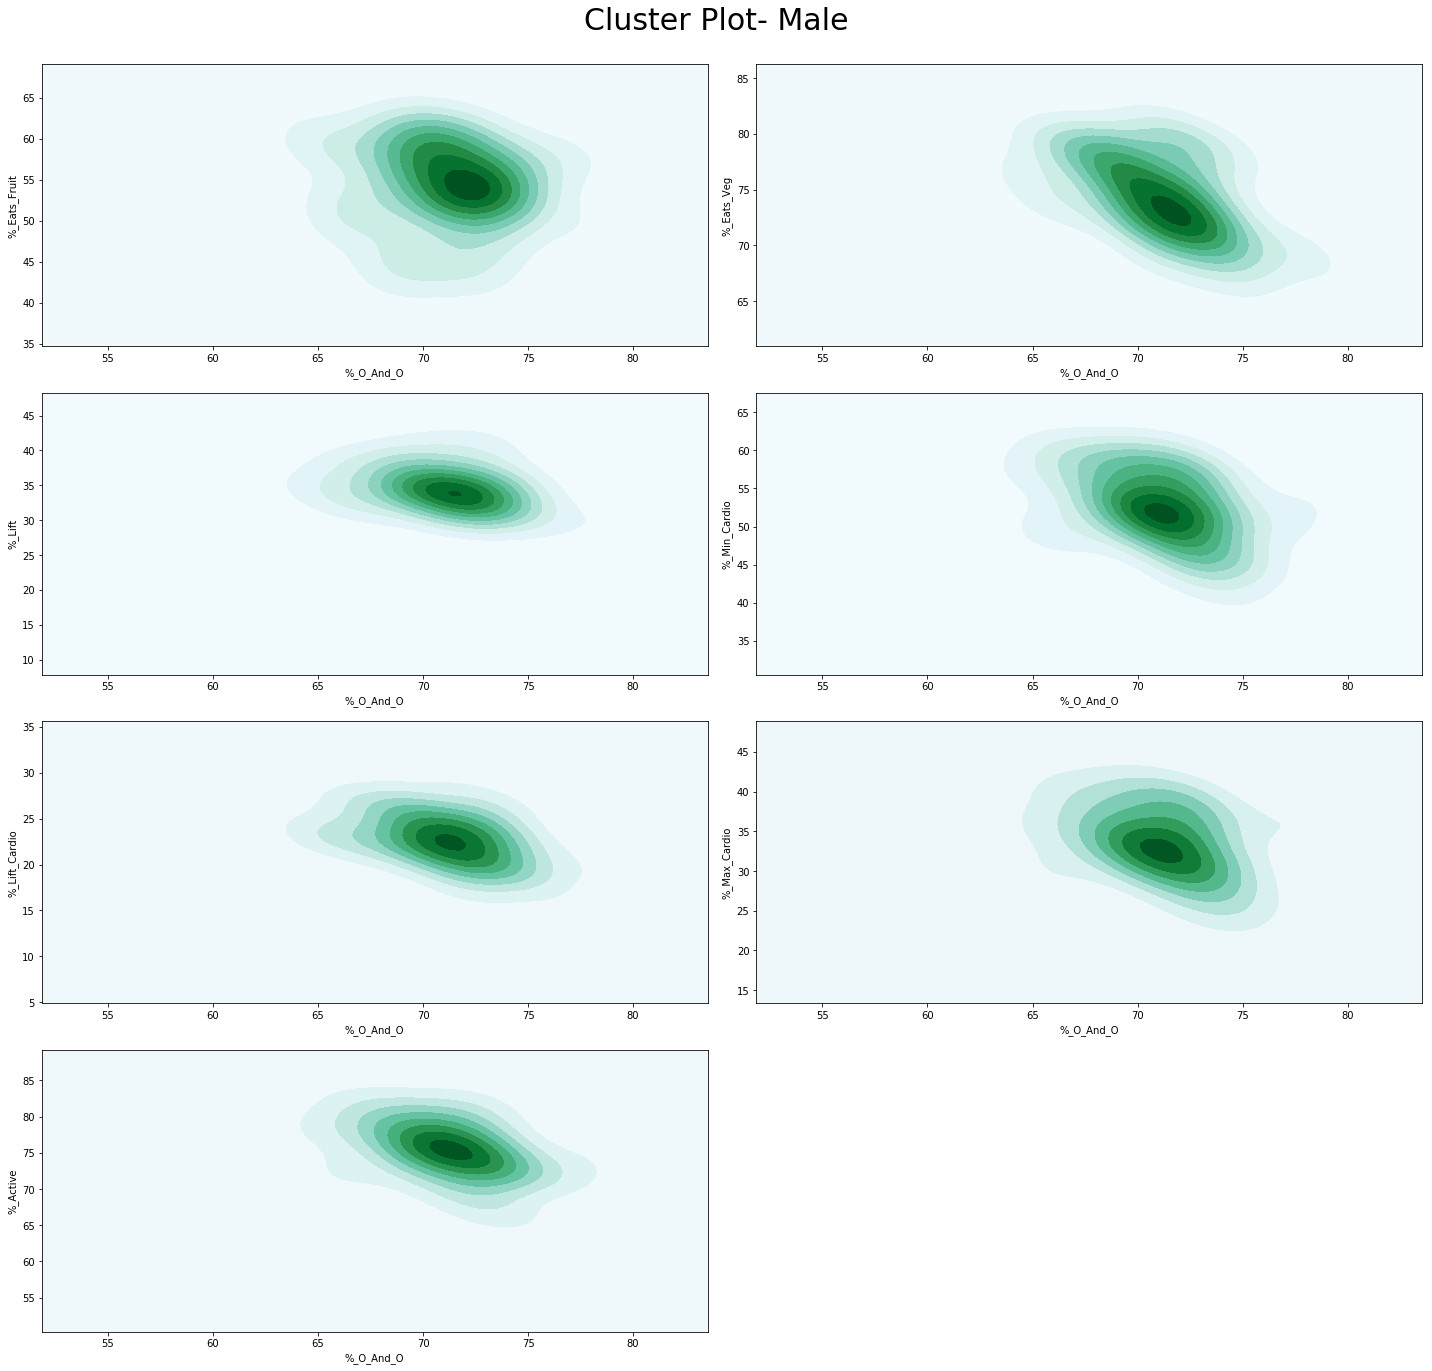

In [30]:
create_jointplots(male_df,'%_O_And_O', "Cluster Plot- Male")

In the plots that represented more strenous exercising, such as maximum cardio and the weight lifting/cardio combo, the negative correlation is more direct. In the lift/cardio plot, for example, the data clusters at 20-25% lift/cardio to 70-75% overweight/obese suggesting that people who both lift and do cardio are well out of the overweight/obese zone. The more moderate exercisers didn't fair as well. The minimum cardio group (which is actually inclusive of the maximum cardio group) was in the 50-55% min cardio to 70-75% overweight/obese. So there would be some overlap of people who did some cario and those that were overweight/obese.

The effects of exercise was not unexpected, although it does infer a more rigorous routine of lifting and cardio is required to stay out of overweight/obese category. What was unexpected and somewhat disheartening was how the data clusted in the 'eating vegetables' plot. That plot clusted in at 70-75% eat vegetables and 70-75% overweight/obese. Apparently, eating your vegetables is not enough to keep the fat away. 

The women's plot showed similiar findings:

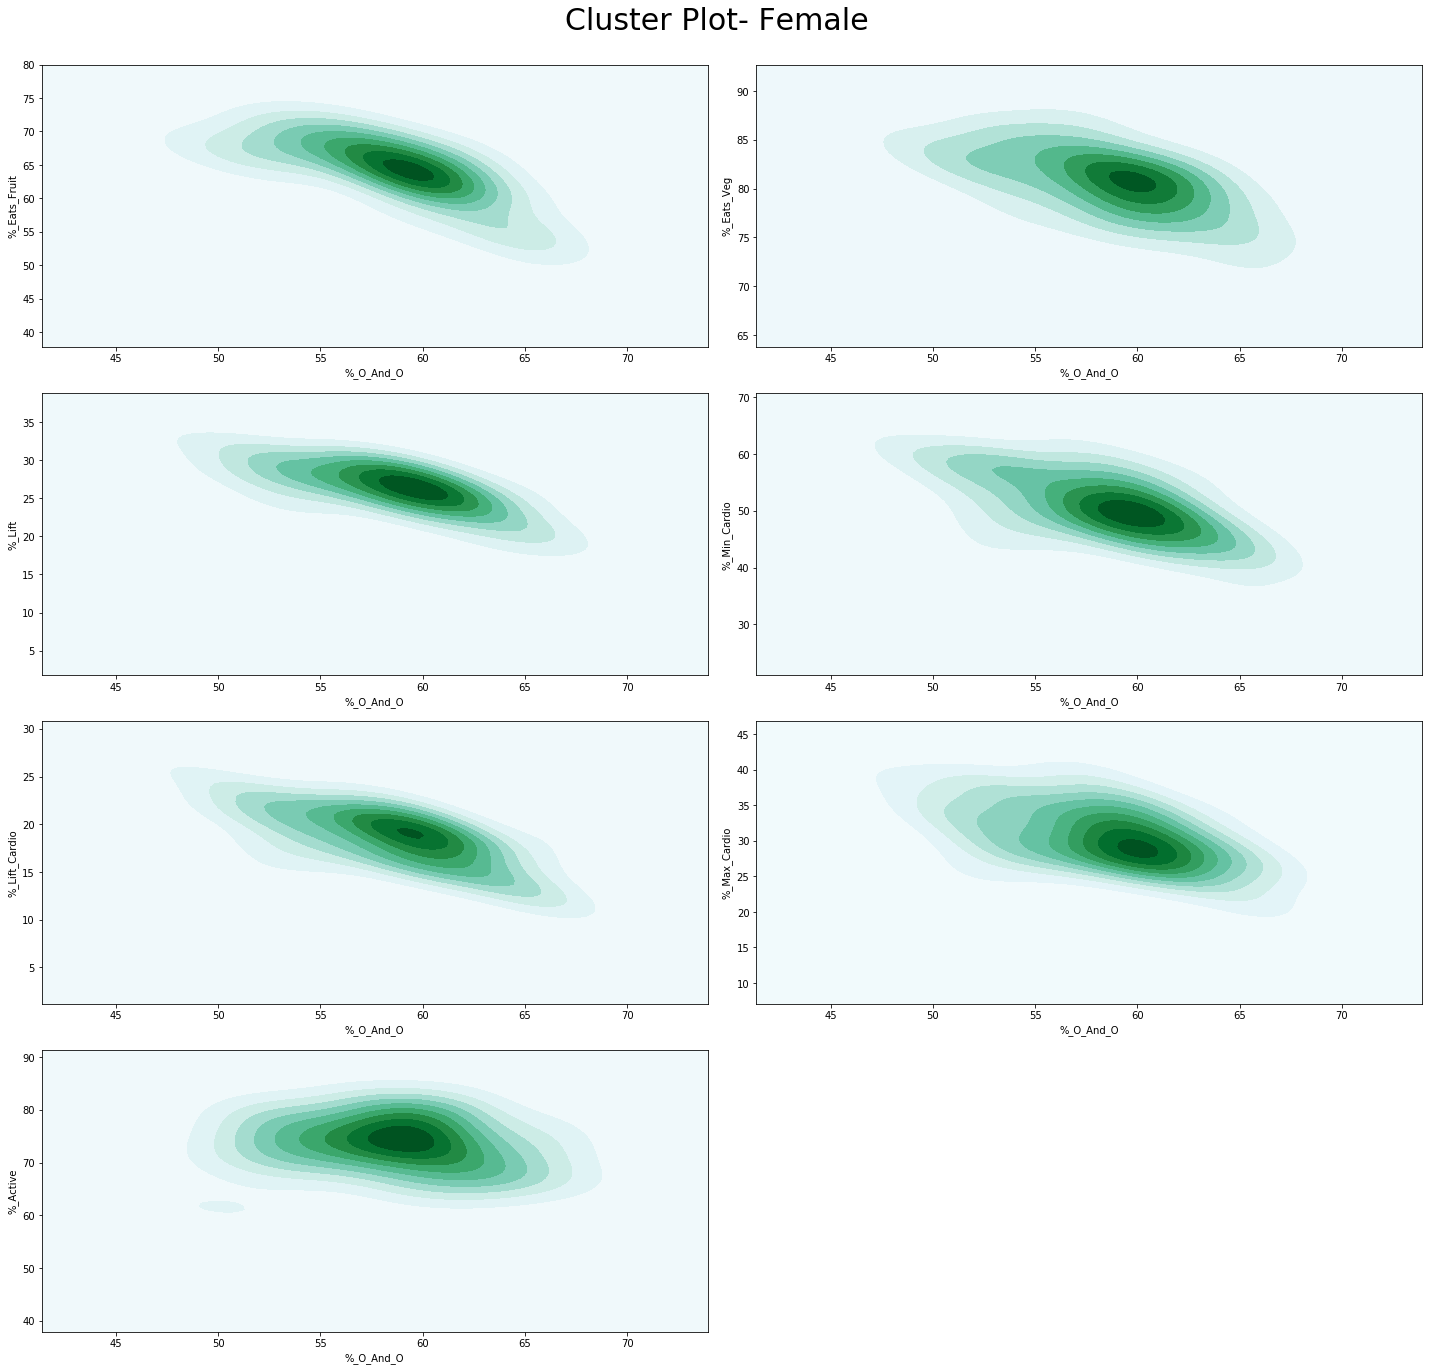

In [31]:
create_jointplots(female_df,'%_O_And_O', 'Cluster Plot- Female')

Exercise did have a higher impact on keeping the women out of the obese/overweight range. But once again, eating vegetables was not a good way to keep off the pounds.

## Conclusions Drawn and Research Proposal

#### The Problem

This study looked at the various factors that could lead to maintaining a healthy body weight. And while there are definite correlations between healthy habits and obesity/overweight classifications, the fact remains that the percentage of overweight and obese people range from 50-80% in every state. 

What would be the best way to bring those percentages down?

#### The Possible Solution

I applaud that this study was done at all, but the glaring piece of data that is missing is probably the most important one: calorie intake. Exactly how much are people eating?

As somebody who exercises consistantly and is a vegetarian, I've come to sadly realize that exercise and eating vegetables aren't enough to maintain a healthy body weight. You must also be aware of the quality of food that you take in and also you must not over eat.

A cheese pizza loaded with vegetables is still a pizza and deep fried anything will contain more fat than the same item baked, steamed, or raw. Also, even the healthiest of meals will increase your bodyweight if you eat extra large portions of it.

I propose a study that tests the effect of a diet of healthy well prepared and calorie restricted meals. The projected outcome of this study is that a healthy, portion controlled diet will reduce the rate of obesity and overweight conditions.

#### The Method of Testing

I propose a 6 month study with 1,000 men and 1,000 women split into two groups of 500, one to serve as the control group and the other as the experimental group. 

Before the tests starts, the participants will be given a journal to monitor their food intake for the month prior to the study. This will serve as a baseline to establish their eating habits and calorie intake before the intervention is introduced.

During the study, the subjects in the experimental group will be given prepared, prepackaged meals that they can take home with them and used throught the week. They will recieve these meals once a week and will also have their weight and body fat percent measured each time they come in to pick up their meals.